In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.explode('job_skills')

In [3]:
df_DA_US['job_posted_month'] = df_DA_US['job_posted_date'].dt.month

In [4]:
df_DA_US_pivot = df_DA_US.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)

In [5]:
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

In [6]:
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

In [7]:
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

In [15]:
df_DA_US_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [8]:
DA_totals = df_DA_US.groupby(by='job_posted_month').size()
df_perc = df_DA_US_pivot.div(DA_totals/100, axis=0)


In [9]:
df_perc = df_perc.reset_index()
df_perc['month'] = df_perc['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_perc = df_perc.set_index('month')

In [10]:
df_perc = df_perc.drop('job_posted_month', axis=1)

<Axes: xlabel='month'>

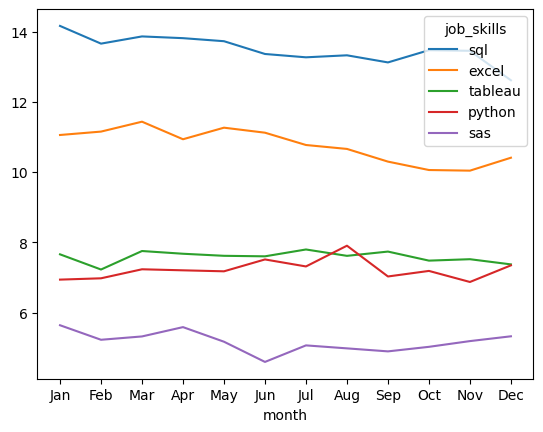

In [13]:
df_perc_plot = df_perc.iloc[:,:5]
sns.lineplot(data=df_perc_plot, dashes=False)